In [54]:
import gym
import random
import numpy as np
from keras.models     import Sequential
from keras.layers     import Dense
from keras.optimizers import Adam

In [55]:
env = gym.make('MountainCar-v0')
env.reset()
goal_steps = 200
score_requirement = -198
intial_games = 10000

#### 1

In [4]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(intial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 3)
            observation, reward, done, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            if observation[0] > -0.2:   #self-defined
                reward = 1
            
            score += reward   
            if done:  # done in wiki: position>0.5 
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:  # one-hot code
                if data[1] == 1:
                    output = [0, 1, 0]
                elif data[1] == 0:
                    output = [1, 0, 0]
                elif data[1] == 2:
                    output = [0, 0, 1]
                training_data.append([data[0], output])
        
        env.reset()
    
    print(accepted_scores)
    
    return training_data

In [5]:
training_data = model_data_preparation()

[-176.0, -186.0, -184.0, -192.0, -174.0, -192.0, -178.0, -180.0, -150.0, -196.0, -190.0, -192.0, -192.0, -176.0, -166.0, -168.0, -198.0, -186.0, -170.0, -172.0, -176.0, -188.0, -174.0, -194.0, -178.0, -190.0, -176.0, -182.0, -182.0, -182.0, -192.0, -198.0, -162.0, -188.0, -174.0, -198.0, -172.0, -184.0, -168.0, -186.0, -176.0, -180.0]


In [6]:
%%time

def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  #initializer
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam()) # keras.losses.categorical_crossentropy

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        # Uncomment this line if you want to see how our bot playing
        # env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   #direct
        if done:
            break

    env.reset()
    scores.append(score)
    
scores1_order = np.sort(scores)
avg_scores1 = sum(scores)/len(scores)
scores1_order

Epoch 1/5
8358/8358 [==============================] - 2s 192us/step - loss: 0.2279
Epoch 2/5
8358/8358 [==============================] - 1s 101us/step - loss: 0.2225
Epoch 3/5
8358/8358 [==============================] - 1s 96us/step - loss: 0.2219
Epoch 4/5
8358/8358 [==============================] - 1s 132us/step - loss: 0.2214
Epoch 5/5
8358/8358 [==============================] - 1s 116us/step - loss: 0.2209
Wall time: 26.6 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -174.,
       -173., -173., -172., -168., -166., -166., -166., -166., -166.,
       -166., -165., -165., -165., -165., -164., -164., -164., -164.,
       -164., -163., -163., -163., -163., -163., -163., -163., -163.,
       -163., -163., -163., -163., -162., -157., -153., -153., -150.,
       -144., -141., -140., -140., -138., -138., -138., -138., -137.,
       -136., -136., -135., -135., -134., -134., -133., -133., -132.,
       -132., -132., -132., -131., -131., -131., -131., -131., -130.,
       -130., -129., -129., -129., -129., -129., -129., -129., -129.,
       -129.])

#### 2

In [10]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(intial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 3)
            observation, reward, done, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            if observation[0] > -0.1:  #self-defined
                reward = 1
            
            score += reward   
            if done:  # done in wiki: position>0.5 
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:  # one-hot code
                if data[1] == 1:
                    output = [0, 1, 0]
                elif data[1] == 0:
                    output = [1, 0, 0]
                elif data[1] == 2:
                    output = [0, 0, 1]
                training_data.append([data[0], output])
        
        env.reset()
    
    print(accepted_scores)
    
    return training_data

In [11]:
training_data = model_data_preparation()

[-186.0, -190.0]


In [12]:
%%time

def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  #initializer
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam()) # keras.losses.categorical_crossentropy

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        # Uncomment this line if you want to see how our bot playing
        # env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   #direct
        if done:
            break

    env.reset()
    scores.append(score)
    
scores2_order = np.sort(scores)
avg_scores2 = sum(scores)/len(scores)
scores2_order

Epoch 1/5
398/398 [==============================] - 0s 314us/step - loss: 0.3061
Epoch 2/5
398/398 [==============================] - 0s 90us/step - loss: 0.2557
Epoch 3/5
398/398 [==============================] - 0s 88us/step - loss: 0.2323
Epoch 4/5
398/398 [==============================] - 0s 88us/step - loss: 0.2283
Epoch 5/5
398/398 [==============================] - 0s 90us/step - loss: 0.2270
Wall time: 16.7 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200.])

#### 3

In [13]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(intial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 3)
            observation, reward, done, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            if observation[0] > -0.3:  #self-defined
                reward = 1
            
            score += reward   
            if done:  # done in wiki: position>0.5 
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:  # one-hot code
                if data[1] == 1:
                    output = [0, 1, 0]
                elif data[1] == 0:
                    output = [1, 0, 0]
                elif data[1] == 2:
                    output = [0, 0, 1]
                training_data.append([data[0], output])
        
        env.reset()
    
    print(accepted_scores)
    
    return training_data

In [14]:
training_data = model_data_preparation()

[-174.0, -168.0, -180.0, -168.0, -188.0, -172.0, -178.0, -166.0, -160.0, -182.0, -168.0, -182.0, -178.0, -148.0, -164.0, -130.0, -178.0, -158.0, -190.0, -162.0, -168.0, -176.0, -198.0, -190.0, -186.0, -174.0, -188.0, -180.0, -180.0, -158.0, -178.0, -196.0, -166.0, -176.0, -156.0, -140.0, -160.0, -186.0, -174.0, -168.0, -154.0, -184.0, -184.0, -178.0, -170.0, -198.0, -186.0, -142.0, -190.0, -186.0, -196.0, -182.0, -190.0, -182.0, -194.0, -176.0, -172.0, -184.0, -188.0, -198.0, -184.0, -178.0, -192.0, -184.0, -150.0, -186.0, -186.0, -186.0, -166.0, -184.0, -188.0, -174.0, -172.0, -162.0, -198.0, -164.0, -190.0, -186.0, -188.0, -174.0, -172.0, -178.0, -162.0, -180.0, -156.0, -186.0, -170.0, -180.0, -192.0, -144.0, -176.0, -166.0, -180.0, -184.0, -160.0, -174.0, -164.0, -144.0, -174.0, -168.0, -168.0, -170.0, -188.0, -160.0, -178.0, -190.0, -174.0, -186.0, -188.0, -176.0, -190.0, -142.0, -176.0, -192.0, -180.0, -170.0, -186.0, -164.0, -166.0, -176.0, -186.0, -182.0, -182.0, -174.0, -168.0,

In [15]:
%%time
def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  #initializer
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam()) # keras.losses.categorical_crossentropy

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
#         Uncomment this line if you want to see how our bot playing
#        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   #direct
        if done:
            break

    env.reset()
    scores.append(score)
    
scores3_order = np.sort(scores)
avg_scores3 = sum(scores)/len(scores)
scores3_order

Epoch 1/5
159996/159996 [==============================] - 13s 84us/step - loss: 0.1416
Epoch 2/5
159996/159996 [==============================] - 13s 81us/step - loss: 0.1415
Epoch 3/5
159996/159996 [==============================] - 14s 89us/step - loss: 0.1300
Epoch 4/5
159996/159996 [==============================] - 13s 83us/step - loss: 0.1107
Epoch 5/5
159996/159996 [==============================] - 13s 81us/step - loss: 0.1063
Wall time: 1min 20s


array([-200., -200., -200., -200., -200., -200., -200., -153., -149.,
       -149., -147., -147., -145., -143., -143., -143., -141., -141.,
       -140., -140., -140., -140., -140., -140., -138., -138., -138.,
       -138., -137., -137., -137., -137., -137., -137., -136., -136.,
       -136., -136., -136., -136., -136., -136., -136., -136., -136.,
       -136., -136., -136., -135., -135., -135., -135., -135., -135.,
       -135., -134., -134., -134., -134., -134., -134., -133., -132.,
       -131., -131., -131., -131., -130., -130., -130., -130., -129.,
       -129., -129., -129., -128., -128., -128., -128., -128., -128.,
       -127., -126., -126., -126., -126., -126., -126., -126., -126.,
       -126., -126., -126., -125., -125., -125., -125., -125., -125.,
       -124.])

#### 4

In [17]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(intial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 3)
            observation, reward, done, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            if observation[0] > -0.1:  #self-defined
                reward = 1.5
            elif observation[0] > -0.2: # #self-defined
                reward = 1
            elif observation[0] > -0.3: # #self-defined
                reward = 0.5
            
            score += reward   
            if done:  # done in wiki: position>0.5 
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:  # one-hot code
                if data[1] == 1:
                    output = [0, 1, 0]
                elif data[1] == 0:
                    output = [1, 0, 0]
                elif data[1] == 2:
                    output = [0, 0, 1]
                training_data.append([data[0], output])
        
        env.reset()
    
    print(accepted_scores)
    
    return training_data

In [18]:
training_data = model_data_preparation()

[-179.0, -191.0, -171.5, -182.0, -188.0, -168.5, -185.0, -182.0, -185.0, -186.5, -185.0, -182.0, -183.5, -189.5, -185.0, -192.5, -197.0, -183.5, -186.5, -160.0, -194.0, -176.0, -186.5, -186.5, -192.5, -186.5, -183.5, -186.5, -179.0, -183.5, -171.5, -186.5, -171.5, -182.0, -192.5, -147.5, -180.5, -186.5, -177.5, -156.5, -189.5, -189.5, -186.5, -179.0, -182.0, -183.5, -159.5, -188.0, -183.5, -195.5, -182.0, -194.0, -174.5, -160.5, -188.0, -180.5, -176.0, -185.0, -173.0, -182.0, -191.0, -192.5, -185.0, -189.5, -194.0, -180.5, -191.0, -197.0, -185.0, -194.0, -191.0, -189.5, -186.5, -185.0, -183.5, -173.0, -194.0, -173.0, -186.5, -176.0, -192.5, -170.0, -180.5, -173.0, -194.0, -174.5, -165.0, -177.5, -138.0, -192.5, -177.5, -174.5, -176.0, -173.0, -192.5, -191.0, -182.0, -179.0, -189.5, -167.0, -148.5, -153.5, -183.5, -182.0, -173.0, -174.5, -185.0, -185.0, -152.5, -182.0, -174.5, -183.5, -180.5, -194.0, -171.5, -177.5, -195.5, -195.5, -173.0, -183.5, -195.5, -164.0, -183.5, -182.0, -183.5,

In [21]:
%%time
def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  #initializer
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='logcosh', optimizer=Adam()) # keras.losses.categorical_crossentropy

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
#         Uncomment this line if you want to see how our bot playing
#        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   #direct
        if done:
            break

    env.reset()
    scores.append(score)
    
scores4_order = np.sort(scores)
avg_scores4 = sum(scores)/len(scores)
scores4_order

Epoch 1/5
148653/148653 [==============================] - 12s 80us/step - loss: 0.1053
Epoch 2/5
148653/148653 [==============================] - 12s 80us/step - loss: 0.1048
Epoch 3/5
148653/148653 [==============================] - 13s 84us/step - loss: 0.1047
Epoch 4/5
148653/148653 [==============================] - 13s 86us/step - loss: 0.1047
Epoch 5/5
148653/148653 [==============================] - 13s 89us/step - loss: 0.1046
Wall time: 1min 16s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -157.,
       -157., -157., -156., -156., -156., -125., -124., -121., -119.,
       -118., -118., -117., -117., -117., -117., -117., -117., -117.,
       -117., -117., -117., -117., -117., -117., -116., -116., -116.,
       -116., -116., -116., -116., -116., -116., -116., -116., -116.,
       -116., -116., -116., -116., -116., -116., -115., -115., -115.,
       -115., -115., -115., -115., -115., -115., -115., -115., -115.,
       -115., -115., -114., -114., -114., -114., -114., -114., -114.,
       -114., -114., -114., -114., -114., -114., -114., -114., -114.,
       -114., -114., -113., -113., -113., -113., -113., -113., -113.,
       -113.])

#### 5

In [31]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(intial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 3)
            observation, reward, done, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            if observation[0] > -0.1:  #self-defined
                reward = 9
            elif observation[0] > -0.2: # #self-defined
                reward = 0.6
            elif observation[0] > -0.3: # #self-defined
                reward = 0.3
            
            score += reward   
            if done:  # done in wiki: position>0.5 
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:  # one-hot code
                if data[1] == 1:
                    output = [0, 1, 0]
                elif data[1] == 0:
                    output = [1, 0, 0]
                elif data[1] == 2:
                    output = [0, 0, 1]
                training_data.append([data[0], output])
        
        env.reset()
    
    print(accepted_scores)
    
    return training_data

In [32]:
training_data = model_data_preparation()

[-194.8, -184.39999999999986, -196.09999999999997, -180.49999999999983, -179.19999999999982, -189.5999999999999, -188.3, -154.29999999999987, -192.19999999999993, -194.79999999999995, -150.0999999999999, -159.70000000000007, -190.89999999999992, -190.90000000000003, -197.39999999999998, -189.5999999999999, -194.79999999999995, -185.70000000000005, -181.79999999999984, -197.39999999999998, -157.09999999999985, -171.40000000000006, -183.10000000000002, -176.59999999999985, -193.49999999999994, -193.49999999999994, -186.9999999999999, -197.39999999999998, -190.90000000000003, -176.59999999999985, -187.00000000000003, -190.89999999999998, -179.19999999999982, -185.69999999999987, -172.50000000000006, -172.6999999999998, -186.9999999999999, -181.79999999999984, -196.09999999999997, -184.39999999999986, -192.20000000000002, -189.5999999999999, -194.8, -167.39999999999998, -194.79999999999995, -185.69999999999987, -181.7999999999999, -196.09999999999997, -189.5999999999999, -189.5999999999999

In [33]:
%%time
def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  #initializer
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='squared_hinge', optimizer=Adam()) # keras.losses.categorical_crossentropy

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
#         Uncomment this line if you want to see how our bot playing
#        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   #direct
        if done:
            break

    env.reset()
    scores.append(score)
    
scores5_order = np.sort(scores)
avg_scores5 = sum(scores)/len(scores)
scores5_order

Epoch 1/5
160991/160991 [==============================] - 14s 88us/step - loss: 0.8873
Epoch 2/5
160991/160991 [==============================] - 14s 89us/step - loss: 0.8850
Epoch 3/5
160991/160991 [==============================] - 15s 91us/step - loss: 0.8843
Epoch 4/5
160991/160991 [==============================] - 16s 99us/step - loss: 0.8837
Epoch 5/5
160991/160991 [==============================] - 15s 92us/step - loss: 0.8834
Wall time: 1min 25s


array([-146., -145., -143., -138., -138., -136., -135., -132., -130.,
       -130., -128., -127., -127., -127., -127., -127., -127., -127.,
       -127., -127., -127., -127., -127., -127., -127., -127., -127.,
       -127., -127., -127., -127., -127., -127., -127., -127., -127.,
       -127., -127., -127., -127., -126., -126., -126., -126., -126.,
       -126., -126., -126., -126., -126., -126., -126., -126., -126.,
       -126., -126., -126., -126., -126., -126., -126., -126., -126.,
       -126., -126., -126., -126., -125., -125., -125., -125., -125.,
       -125., -125., -125., -125., -125., -125., -125., -125., -125.,
       -125., -125., -125., -124., -124., -121., -108.,  -99.,  -98.,
        -97.,  -96.,  -95.,  -94.,  -91.,  -91.,  -90.,  -87.,  -87.,
        -86.])

#### 6

In [47]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(intial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 3)
            observation, reward, done, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            if observation[0] > -0.1:  #self-defined
                reward = 9
            elif observation[0] > -0.2: # #self-defined
                reward = 0.6
            elif observation[0] > -0.3: # #self-defined
                reward = 0.3
            
            score += reward   
            if done:  # done in wiki: position>0.5 
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:  # one-hot code
                if data[1] == 1:
                    output = [0, 1, 0]
                elif data[1] == 0:
                    output = [1, 0, 0]
                elif data[1] == 2:
                    output = [0, 0, 1]
                training_data.append([data[0], output])
        
        env.reset()
    
    print(accepted_scores)
    
    return training_data

In [48]:
training_data = model_data_preparation()

[-193.49999999999994, -149.2999999999998, -172.6999999999999, -183.09999999999985, -183.09999999999985, -197.39999999999998, -188.2999999999999, -197.4, -180.49999999999983, -188.29999999999995, -188.2999999999999, -197.39999999999998, -167.50000000000006, -197.4, -193.49999999999994, -197.39999999999998, -167.49999999999986, -184.39999999999986, -176.5999999999999, -196.09999999999997, -181.79999999999984, -175.29999999999978, -179.19999999999982, -192.19999999999993, -184.39999999999986, -185.7, -190.89999999999992, -185.69999999999987, -171.39999999999998, -185.69999999999987, -171.39999999999986, -158.4000000000001, -186.9999999999999, -183.09999999999985, -184.39999999999986, -186.9999999999999, -179.19999999999982, -197.39999999999998, -186.9999999999999, -190.89999999999992, -197.39999999999998, -194.79999999999995, -194.79999999999995, -193.49999999999994, -184.40000000000003, -184.40000000000003, -189.5999999999999, -192.19999999999993, -196.09999999999997, -177.8999999999998,

In [49]:
%%time
def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  #initializer
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='squared_hinge', optimizer=Adam()) # keras.losses.categorical_crossentropy

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
#         Uncomment this line if you want to see how our bot playing
#        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   #direct
        if done:
            break

    env.reset()
    scores.append(score)
    
scores6_order = np.sort(scores)
avg_scores6 = sum(scores)/len(scores)
scores6_order

Epoch 1/5
160792/160792 [==============================] - 14s 87us/step - loss: 0.8877
Epoch 2/5
160792/160792 [==============================] - 15s 92us/step - loss: 0.8850
Epoch 3/5
160792/160792 [==============================] - 15s 91us/step - loss: 0.8843
Epoch 4/5
160792/160792 [==============================] - 15s 93us/step - loss: 0.8839
Epoch 5/5
160792/160792 [==============================] - 15s 96us/step - loss: 0.8834
Wall time: 1min 31s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200.])

### plot

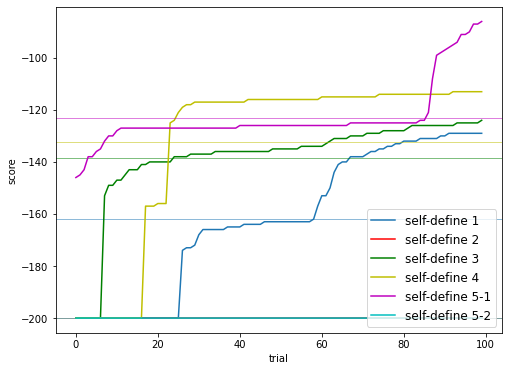

In [53]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(scores1_order,label='self-define 1')
ax.axhline(avg_scores1, linewidth=0.5)  # color='blue', linewidth=0.5

ax.plot(scores2_order, color='r',label='self-define 2')
ax.axhline(avg_scores2, color='r',linewidth=0.5)

ax.plot(scores3_order, color='g',label='self-define 3')
ax.axhline(avg_scores3, color='g',linewidth=0.5)

ax.plot(scores4_order, color='y',label='self-define 4')
ax.axhline(avg_scores4, color='y',linewidth=0.5)

ax.plot(scores5_order, color='m',label='self-define 5-1')
ax.axhline(avg_scores5, color='m',linewidth=0.5)

ax.plot(scores6_order, color='c',label='self-define 5-2')
ax.axhline(avg_scores6, color='c',linewidth=0.5)

# ax.plot(scores7_order, color='c',label='hinge')
# ax.axhline(avg_scores7, color='c',linewidth=0.5)

ax.legend(loc='lower right', prop={"size":12})
ax.margins(0.05)
#ax.set_title('results with different loss')
ax.set_xlabel('trial')
ax.set_ylabel('score')

plt.savefig('reward.png')
# ax.set_rasterized(True)
# plt.savefig('loss.eps', format='eps')

plt.show()